<a href="https://colab.research.google.com/github/Makena-WB/Book-Recommendation-Model/blob/main/dataExp_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install pandas
!pip install scipy



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
pd.options.display.float_format = '{:.2f}'.format

ratings = pd.read_csv('/content/drive/MyDrive/BookData/ratings.csv')
books = pd.read_csv('/content/drive/MyDrive/BookData/books_enriched.csv')


In [5]:
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [6]:
ratings.shape

(5976479, 3)

In [7]:
for col in ratings.columns:
    print(f"Number of {col} is {ratings[col].nunique()}")

Number of user_id is 53424
Number of book_id is 10000
Number of rating is 5


In [8]:
books.shape

(10000, 30)

In [9]:
books.head(3).T

,0,1,2
Unnamed: 0,0,1,2
index,0,1,2
authors,['Suzanne Collins'],"['J.K. Rowling', 'Mary GrandPré']",['Stephenie Meyer']
average_rating,4.34,4.44,3.57
best_book_id,2767052,3,41865
book_id,1,2,3
books_count,272,491,226
description,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,Harry Potter's life is miserable. His parents ...,About three things I was absolutely positive.\...
genres,"['young-adult', 'fiction', 'fantasy', 'science...","['fantasy', 'fiction', 'young-adult', 'classics']","['young-adult', 'fantasy', 'romance', 'fiction..."
goodreads_book_id,2767052,3,41865


In [10]:
nums = books.select_dtypes(include=[np.number]).columns
cats = books.select_dtypes(exclude=[np.number]).columns

books[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10000.00,4999.50,2886.90,0.00,2499.75,4999.50,7499.25,9999.00
index,10000.00,4526.32,2567.92,0.00,2351.75,4567.50,6661.25,9999.00
average_rating,10000.00,4.00,0.25,2.47,3.85,4.02,4.18,4.82
best_book_id,10000.00,5471213.58,7827329.89,1.00,47911.75,425123.50,9636112.50,35534230.00
book_id,10000.00,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
books_count,10000.00,75.71,170.47,1.00,23.00,40.00,67.00,3455.00
goodreads_book_id,10000.00,5264696.51,7575461.86,1.00,46275.75,394965.50,9382225.25,33288638.00
isbn13,9415.00,9755044298883.46,442861920665.57,195170342.00,9780316192995.00,9780451528640.00,9780830777175.00,9790007672390.00
original_publication_year,9979.00,1981.99,152.58,-1750.00,1990.00,2004.00,2011.00,2017.00
pages,9927.00,359.42,216.95,0.00,250.00,336.00,424.00,5216.00


In [11]:
books[cats].describe().T

,count,unique,top,freq
authors,10000,5057,['Stephen King'],58
description,9943,9772,The first in a spectacularly genre-mashing adv...,4
genres,10000,4351,"['fantasy', 'fiction']",152
image_url,10000,6669,https://s.gr-assets.com/assets/nophoto/book/11...,3332
isbn,9300,9300,439023483,1
language_code,10000,41,eng,9680
original_title,9415,9274,,5
publishDate,9992,4679,"(None, None, None)",75
small_image_url,10000,6669,https://s.gr-assets.com/assets/nophoto/book/50...,3332
title,10000,9964,Selected Poems,4


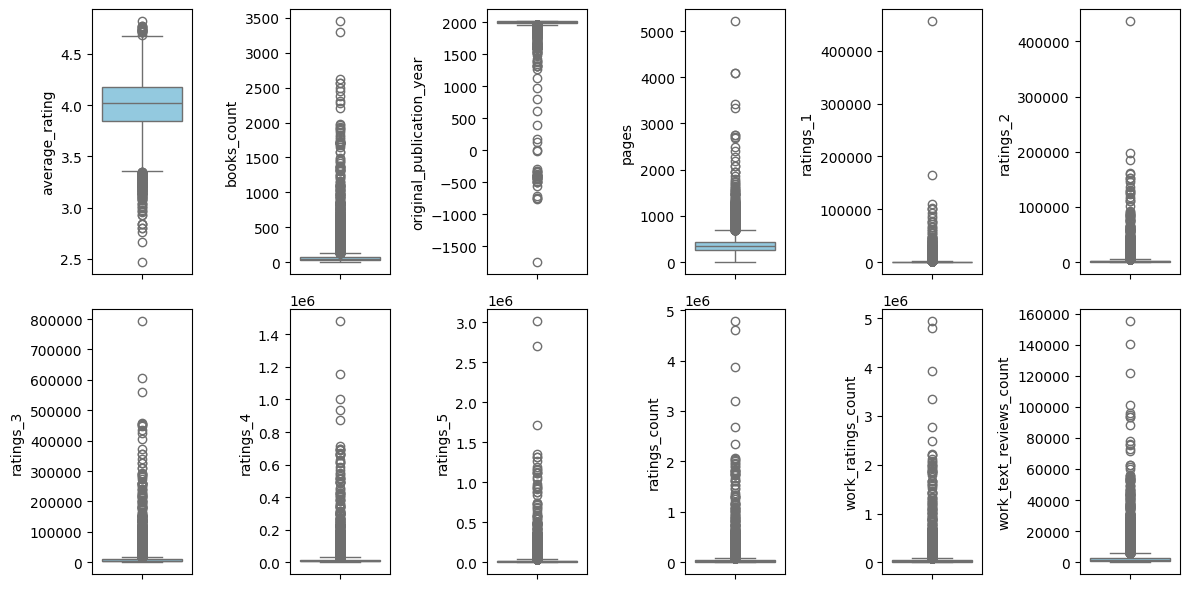

In [12]:
# select real numerical columns
not_unique_nums = ['average_rating', 'books_count', 'original_publication_year', 'pages',
                    'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'ratings_count',
                    'work_ratings_count', 'work_text_reviews_count']

# visualize
plt.figure(figsize=(12,6))
features = not_unique_nums
for i in range(0, len(features)):
    plt.subplot(2, 6, i+1)
    sns.boxplot(y=books[features[i]], color='skyblue')
    plt.tight_layout()

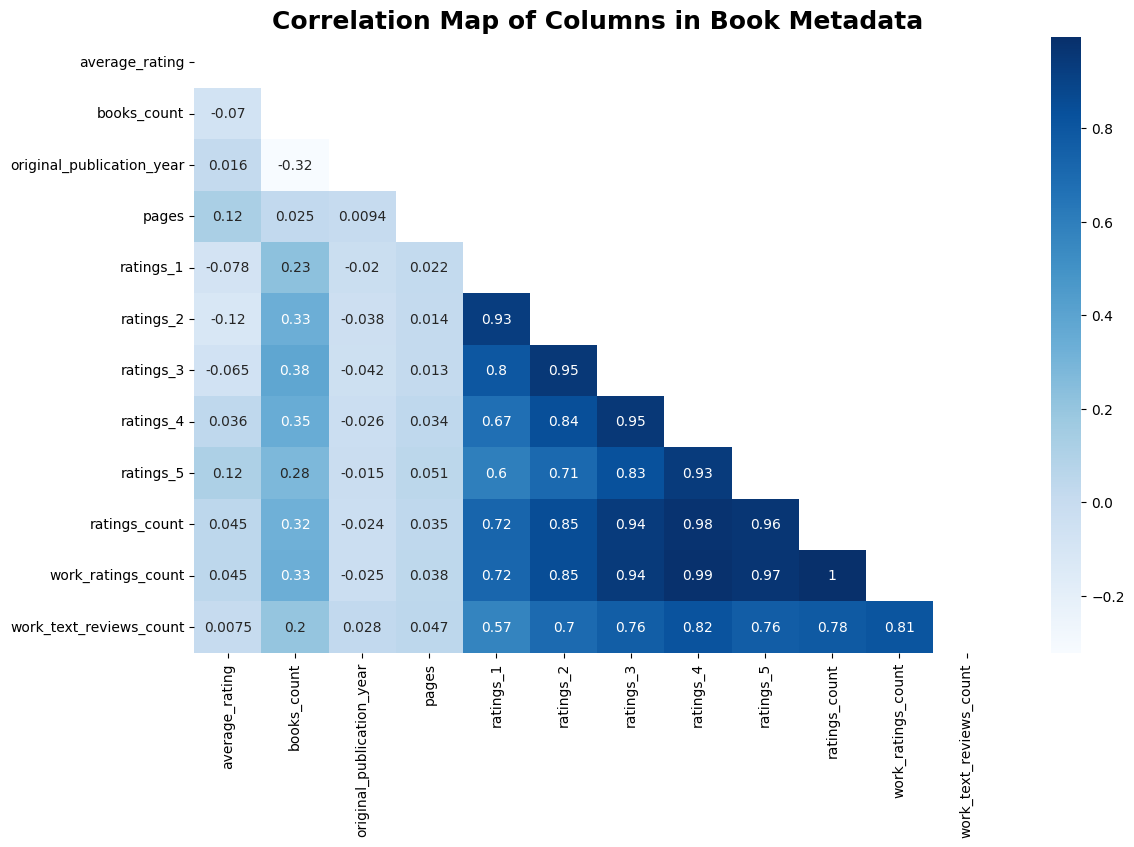

In [13]:
# build correlation table
corr = books[not_unique_nums].corr()

# visualize
upper_triangle = np.triu(corr)
plt.figure(figsize=(13,8))
sns.heatmap(corr, cmap="Blues", annot=True, mask=upper_triangle)
plt.title('Correlation Map of Columns in Book Metadata', weight='bold', fontsize=18)
plt.show()

Data Preprocessing

In [14]:
dataset = [ratings, books]
for data in dataset:
    print(data.isnull().values.any())

False
True


In [15]:
for data in dataset:
    print(data.duplicated().values.any())


False
False


In [16]:
Books = books.copy()

In [17]:
percent_missing = Books.isnull().sum() * 100 / len(Books)
missing_value = (pd.DataFrame({'percent_missing': percent_missing})).sort_values(by=['percent_missing'], ascending=False)
missing_value[missing_value['percent_missing']>0]

,percent_missing
isbn,7.00
original_title,5.85
isbn13,5.85
pages,0.73
description,0.57
original_publication_year,0.21
publishDate,0.08


In [18]:
Books[Books['original_publication_year'].isnull()][['original_publication_year', 'publishDate']]

,original_publication_year,publishDate
198,NaN,October 28th 2008
3249,NaN,February 7th 2006
3881,NaN,September 29th 2009
4252,NaN,November 10th 2010
4303,NaN,June 23rd 2009
4392,NaN,April 8th 2013
5001,NaN,November 9th 2004
5208,NaN,December 6th 2010
5648,NaN,October 11th 2006
7163,NaN,November 25th 2004


In [19]:
Books['publishDate'].replace(r"[(')]", "", regex=True, inplace=True)
Books['publishDate'] = Books['publishDate'].str.extract('(\d{4})$').fillna('')
Books['original_publication_year'] = Books['original_publication_year'].fillna(Books['publishDate'])

<ipython-input-19-eff548b4c373>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Books['publishDate'].replace(r"[(')]", "", regex=True, inplace=True)


In [20]:
# impute null in description with book's title.
Books['description'] = Books['description'].fillna(Books['title'])

# impute null in pages with median
Books['pages'] = Books['pages'].fillna(Books['pages'].median())

# drop unnecessary columns with null
Books = Books.drop(['isbn', 'original_title', 'isbn13', 'publishDate'], axis=1)

Feature Engineering

In [21]:
# keep important columns, drop the rest
cols_to_keep = ['book_id', 'title', 'authors', 'original_publication_year', 'pages', 'description', 'small_image_url', 'genres', 'average_rating', 'ratings_count', 'books_count']
Books = Books[cols_to_keep]

def show_image(val):
    return '<img src="{}" width=50></img>'.format(val)

# display max column
with pd.option_context('display.max_colwidth', None):
    display(Books.head(5).style.format({'small_image_url': show_image}))

,book_id,title,authors,original_publication_year,pages,description,small_image_url,genres,average_rating,ratings_count,books_count
0,1,"The Hunger Games (The Hunger Games, #1)",['Suzanne Collins'],2008.000000,374.000000,"WINNING MEANS FAME AND FORTUNE.LOSING MEANS CERTAIN DEATH.THE HUNGER GAMES HAVE BEGUN. . . .In the ruins of a place once known as North America lies the nation of Panem, a shining Capitol surrounded by twelve outlying districts. The Capitol is harsh and cruel and keeps the districts in line by forcing them all to send one boy and once girl between the ages of twelve and eighteen to participate in the annual Hunger Games, a fight to the death on live TV.Sixteen-year-old Katniss Everdeen regards it as a death sentence when she steps forward to take her sister's place in the Games. But Katniss has been close to dead before—and survival, for her, is second nature. Without really meaning to, she becomes a contender. But if she is to win, she will have to start making choices that weight survival against humanity and life against love.",,"['young-adult', 'fiction', 'fantasy', 'science-fiction', 'romance']",4.340000,4780653,272
1,2,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)","['J.K. Rowling', 'Mary GrandPré']",1997.000000,309.000000,"Harry Potter's life is miserable. His parents are dead and he's stuck with his heartless relatives, who force him to live in a tiny closet under the stairs. But his fortune changes when he receives a letter that tells him the truth about himself: he's a wizard. A mysterious visitor rescues him from his relatives and takes him to his new home, Hogwarts School of Witchcraft and Wizardry.After a lifetime of bottling up his magical powers, Harry finally feels like a normal kid. But even within the Wizarding community, he is special. He is the boy who lived: the only person to have ever survived a killing curse inflicted by the evil Lord Voldemort, who launched a brutal takeover of the Wizarding world, only to vanish after failing to kill Harry.Though Harry's first year at Hogwarts is the best of his life, not everything is perfect. There is a dangerous secret object hidden within the castle walls, and Harry believes it's his responsibility to prevent it from falling into evil hands. But doing so will bring him into contact with forces more terrifying than he ever could have imagined.Full of sympathetic characters, wildly imaginative situations, and countless exciting details, the first installment in the series assembles an unforgettable magical world and sets the stage for many high-stakes adventures to come.",,"['fantasy', 'fiction', 'young-adult', 'classics']",4.440000,4602479,491
2,3,"Twilight (Twilight, #1)",['Stephenie Meyer'],2005.000000,501.000000,"About three things I was absolutely positive. First, Edward was a vampire. Second, there was a part of him—and I didn't know how dominant that part might be—that thirsted for my blood. And third, I was unconditionally and irrevocably in love with him. Deeply seductive and extraordinarily suspenseful, Twilight is a love story with bite.",,"['young-adult', 'fantasy', 'romance', 'fiction', 'paranormal']",3.570000,3866839,226
3,4,To Kill a Mockingbird,['Harper Lee'],1960.000000,324.000000,"The unforgettable novel of a childhood in a sleepy Southern town and the crisis of conscience that rocked it, To Kill A Mockingbird became both an instant bestseller and a critical success when it was first published in 1960. It went on to win the Pulitzer Prize in 1961 and was later made into an Academy Award-winning film, also a classic.Compassionate, dramatic, and deeply moving, To Kill A Mockingbird takes readers to the roots of human behavior - to innocence and experience, kindness and cruelty, love and hatred, humor and pathos. Now with over 18 million copies in print and translated into forty languages, this regional story by a young Alabama woman claims universal appeal. Harper Lee always considered her book to be a simple love story. 

In [22]:
# delete unnecessary characters from authors, genres and description column
col_trans = ['authors', 'genres', 'description']
for col in col_trans:
    Books[col].replace(r"[\[\]\-\\\/\"—'()|:]", "", regex=True, inplace=True)
Books['description'].replace({"\n" : " ", "isbn13" : "", "isbn" : "", r"[0-9]{8,}" : "", r"[.,]" : ""}, regex=True, inplace=True)
Books['description'] = Books['description'].str.lower()

<ipython-input-22-40e9a4648fc4>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Books[col].replace(r"[\[\]\-\\\/\"—'()|:]", "", regex=True, inplace=True)
<ipython-input-22-40e9a4648fc4>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [23]:
def show_image(val):
    return '<img src="{}" width=50></img>'.format(val)

with pd.option_context('display.max_colwidth', None):
    display(Books.sample(5).style.format({'small_image_url': show_image}))

,book_id,title,authors,original_publication_year,pages,description,small_image_url,genres,average_rating,ratings_count,books_count
1851,1970,Possession,A.S. Byatt,1990.000000,555.000000,possession is an exhilarating novel of wit and romance at once an intellectual mystery and triumphant love story it is the tale of a pair of young scholars researching the lives of two victorian poets as they uncover their letters journals and poems and track their movements from london to yorkshirefrom spiritualist séances to the fairyhaunted far west of brittanywhat emerges is an extraordinary counterpoint of passions and ideasman booker prize winner 1990,,"fiction, historicalfiction, romance, classics, mystery, poetry",3.880000,56064,114
35,40,"Eat, Pray, Love",Elizabeth Gilbert,2006.000000,368.000000,a celebrated writers irresistible candid and eloquent account of her pursuit of worldly pleasure spiritual devotion and what she really wanted out of life around the time elizabeth gilbert turned thirty she went through an earlyonslaught midlife crisis she had everything an educated ambitious american woman was supposed to wanta husband a house a successful career but instead of feeling happy and fulfilled she was consumed with panic grief and confusion she went through a divorce a crushing depression another failed love and the eradication of everything she ever thought she was supposed to be to recover from all this gilbert took a radical step in order to give herself the time and space to find out who she really was and what she really wanted she got rid of her belongings quit her job and undertook a yearlong journey around the worldall alone eat pray love is the absorbing chronicle of that year her aim was to visit three places where she could examine one aspect of her own nature set against the backdrop of a culture that has traditionally done that one thing very well in rome she studied the art of pleasure learning to speak italian and gaining the twentythree happiest pounds of her life india was for the art of devotion and with the help of a native guru and a surprisingly wise cowboy from texas she embarked on four uninterrupted months of spiritual exploration in bali she studied the art of balance between worldly enjoyment and divine transcendence she became the pupil of an elderly medicine man and also fell in love the best wayunexpectedly an intensely articulate and moving memoir of selfdiscovery eat pray love is about what can happen when you claim responsibility for your own contentment and stop trying to live in imitation of society’s ideals it is certain to touch anyone who has ever woken up to the unrelenting need for change,,"nonfiction, memoir, travel, biography, chicklit, romance, spirituality, contemporary",3.510000,1181647,185
8433,3597,Lies & the Lying Liars Who Tell Them: A Fair & Balanced Look at the Right,Al Franken,2003.000000,421.000000,al franken one of our savviest satirists people has been studying the rhetoric of the right he has listened to their cries of slander bias and even treason he has examined the bush administrations policies of squandering our surplus ravaging the environment and alienating the rest of the world hes even watched fox news a lot and in this fair and balanced report al bravely and candidly exposes them all for what they are liars lying lying liars al destroys the liberal media bias myth by doing what his targets seem incapable of getting his facts straight using the rights own words against them he takes on the pundits the politicians and the issues in the most talked about book of the yeartimely provocative unfailingly honest and always funny lies sticks it to the most rightwing administration in memory and to the rightwing media hacks who do its bidding,,"nonfiction, history, biography, fiction",3.810000,24071,31
7836,9513,Olivia Joules and the Overactive Imagination,Helen Fielding,2003.000000,320.000000,at the close of the last millennium helen fielding debuted the irrepressible and block

In [24]:
# rename column and change year, pages, and book_count to integer
Books.rename(columns = {'original_publication_year':'year'}, inplace = True)
Books[['year', 'pages', 'books_count']] = Books[['year', 'pages', 'books_count']].astype(int)

Exploratory Data Analysis

<ipython-input-25-9a840f66cc5f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Books['average_rating'], color = '#0047AB')


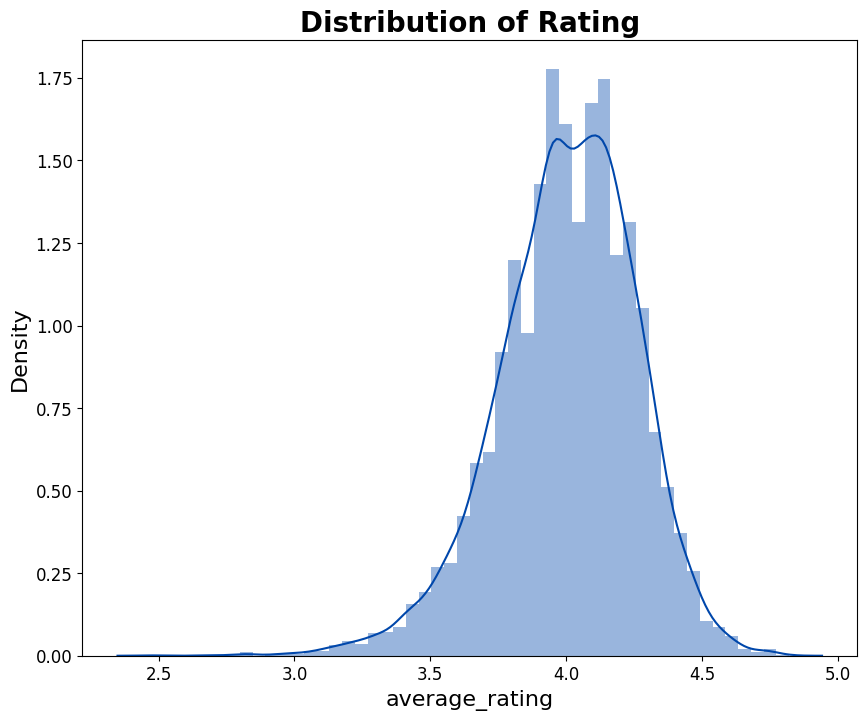

In [25]:
plt.figure(figsize=(10,8))
sns.distplot(Books['average_rating'], color = '#0047AB')
plt.title('Distribution of Rating', weight='bold', fontsize =20)
plt.xlabel('average_rating', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [26]:
av_rating_user = ratings.groupby('user_id')['rating'].mean().reset_index()

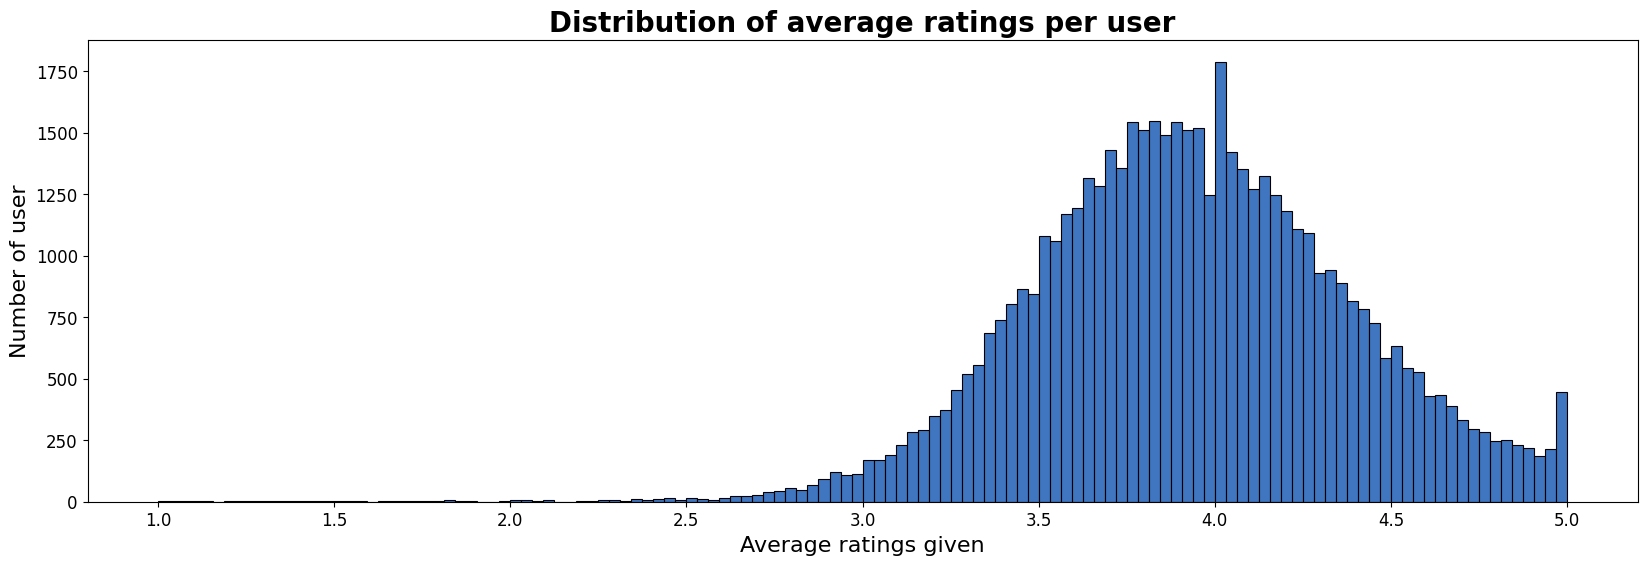

In [27]:
plt.figure(figsize=(20,6))
sns.histplot(data=av_rating_user, x='rating', color='#0047AB')
plt.title('Distribution of average ratings per user', weight='bold', fontsize=20)
plt.xlabel('Average ratings given', fontsize=16)
plt.ylabel('Number of user', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

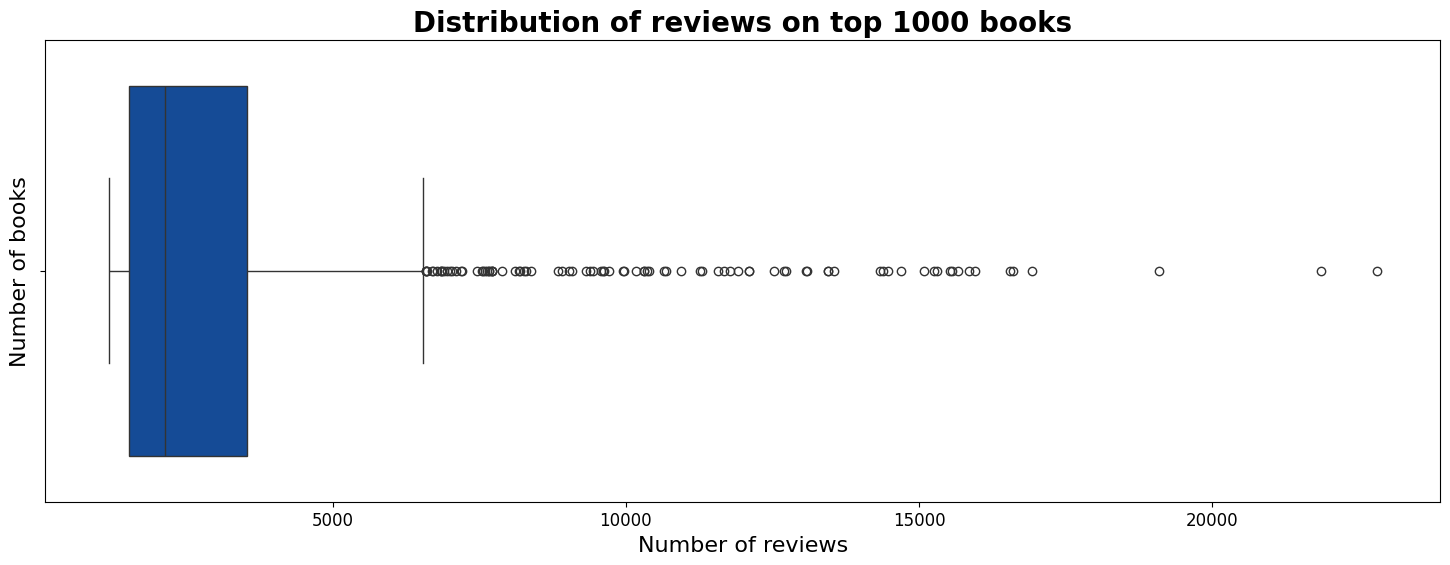

In [28]:
# ratings per book
ratings_per_book = (ratings.groupby('book_id')['rating'].count().reset_index()).sort_values(by='rating', ascending=False)

# visualize
plt.figure(figsize=(18,6))
sns.boxplot(data=ratings_per_book.head(1000), x='rating', color = '#0047AB')
plt.title('Distribution of reviews on top 1000 books', weight='bold', fontsize=20)
plt.xlabel('Number of reviews', fontsize=16)
plt.ylabel('Number of books', fontsize=16)
plt.xticks(fontsize=12)
plt.show()

In [29]:
ratings_per_book['rating'].describe()

,rating
count,10000.00
mean,597.65
std,1267.29
min,8.00
25%,155.00
50%,248.00
75%,503.00
max,22806.00


In [30]:
q3, q1 = np.percentile(ratings_per_book, [75 ,25])
iqr = q3 - q1
maximum = q3 + (1.5 * iqr)
outlier_books = len(ratings_per_book[ratings_per_book['rating'] > maximum])
print(outlier_books)

26


In [31]:
book_per_user = ratings.groupby('user_id')['rating'].count().reset_index()

<ipython-input-32-e6f56a4d9e70>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(book_per_user['rating'], color='#0047AB')


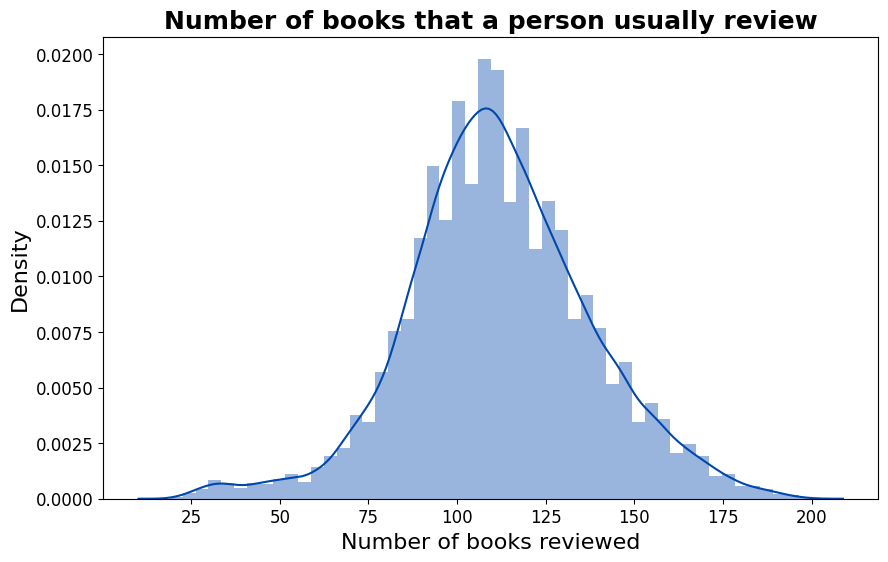

In [32]:
plt.figure(figsize=(10,6))
sns.distplot(book_per_user['rating'], color='#0047AB')
plt.title('Number of books that a person usually review', weight='bold', fontsize=18)
plt.xlabel('Number of books reviewed', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [33]:
book_per_user['rating'].describe()

,rating
count,53424.00
mean,111.87
std,26.07
min,19.00
25%,96.00
50%,111.00
75%,128.00
max,200.00


In [34]:
book_per_user[book_per_user['rating'] == book_per_user['rating'].max()]['user_id'].values

array([12874, 30944])

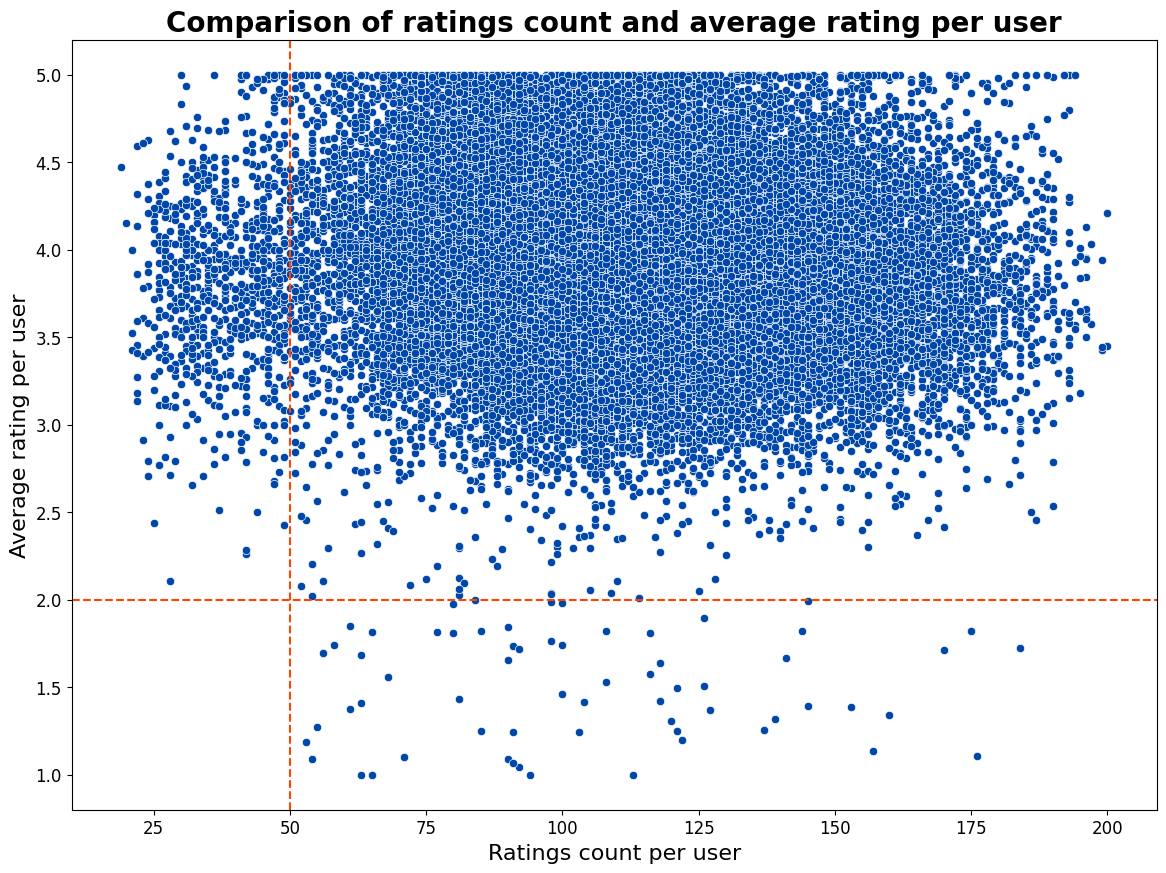

In [35]:
# merge average rating and number of ratings for each userid
id_merged = av_rating_user.merge(book_per_user, left_on="user_id", right_on="user_id")

# visualize
plt.figure(figsize=(14,10))
sns.scatterplot(x=id_merged['rating_y'], y=id_merged['rating_x'], color='#0047AB')
plt.title('Comparison of ratings count and average rating per user', weight='bold', fontsize=20)
plt.xlabel('Ratings count per user', fontsize=16)
plt.ylabel('Average rating per user', fontsize=16)
plt.axhline(y = 2, color = 'orangered', linestyle = '--')
plt.axvline(x = 50, color = 'orangered', linestyle = '--')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [36]:
def show_image(val):
    return '<img src="{}" width=50></img>'.format(val)

# Books with most ratings
book_sorted_ratings_count = Books.sort_values('ratings_count', ascending=False)
book_sorted_ratings_count.head(10).style.format({'small_image_url': show_image})

,book_id,title,authors,year,pages,description,small_image_url,genres,average_rating,ratings_count,books_count
0,1,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,2008,374,winning means fame and fortunelosing means certain deaththe hunger games have begun in the ruins of a place once known as north america lies the nation of panem a shining capitol surrounded by twelve outlying districts the capitol is harsh and cruel and keeps the districts in line by forcing them all to send one boy and once girl between the ages of twelve and eighteen to participate in the annual hunger games a fight to the death on live tvsixteenyearold katniss everdeen regards it as a death sentence when she steps forward to take her sisters place in the games but katniss has been close to dead beforeand survival for her is second nature without really meaning to she becomes a contender but if she is to win she will have to start making choices that weight survival against humanity and life against love,,"youngadult, fiction, fantasy, sciencefiction, romance",4.340000,4780653,272
1,2,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)","J.K. Rowling, Mary GrandPré",1997,309,harry potters life is miserable his parents are dead and hes stuck with his heartless relatives who force him to live in a tiny closet under the stairs but his fortune changes when he receives a letter that tells him the truth about himself hes a wizard a mysterious visitor rescues him from his relatives and takes him to his new home hogwarts school of witchcraft and wizardryafter a lifetime of bottling up his magical powers harry finally feels like a normal kid but even within the wizarding community he is special he is the boy who lived the only person to have ever survived a killing curse inflicted by the evil lord voldemort who launched a brutal takeover of the wizarding world only to vanish after failing to kill harrythough harrys first year at hogwarts is the best of his life not everything is perfect there is a dangerous secret object hidden within the castle walls and harry believes its his responsibility to prevent it from falling into evil hands but doing so will bring him into contact with forces more terrifying than he ever could have imaginedfull of sympathetic characters wildly imaginative situations and countless exciting details the first installment in the series assembles an unforgettable magical world and sets the stage for many highstakes adventures to come,,"fantasy, fiction, youngadult, classics",4.440000,4602479,491
2,3,"Twilight (Twilight, #1)",Stephenie Meyer,2005,501,about three things i was absolutely positive first edward was a vampire second there was a part of himand i didnt know how dominant that part might bethat thirsted for my blood and third i was unconditionally and irrevocably in love with him deeply seductive and extraordinarily suspenseful twilight is a love story with bite,,"youngadult, fantasy, romance, fiction, paranormal",3.570000,3866839,226
3,4,To Kill a Mockingbird,Harper Lee,1960,324,the unforgettable novel of a childhood in a sleepy southern town and the crisis of conscience that rocked it to kill a mockingbird became both an instant bestseller and a critical success when it was first published in 1960 it went on to win the pulitzer prize in 1961 and was later made into an academy awardwinning film also a classiccompassionate dramatic and deeply moving to kill a mockingbird takes readers to the roots of human behavior to innocence and experience kindness and cruelty love and hatred humor and pathos now with over 18 million copies in print and translated into forty languages this regional story by a young alabama woman claims universal appeal harper lee always considered her book to be a simple love story today it is regarded as a masterpiece of american literature,,"classics, fiction, historicalfiction, youngadult",4.250000,3198671,487
4,5,The Great Gatsby,F. Scott Fitzgerald,1925,200,alternate cover edition isbn isbn13 the

In [37]:
def show_image(val):
    return '<img src="{}" width=50></img>'.format(val)

book_sorted_ratings = Books.sort_values('average_rating', ascending=False)
book_sorted_ratings.head(10).style.format({'small_image_url': show_image})

,book_id,title,authors,year,pages,description,small_image_url,genres,average_rating,ratings_count,books_count
3353,3628,The Complete Calvin and Hobbes,Bill Watterson,2005,1456,box set book one book two book three calvin and hobbes is unquestionably one of the most popular comic strips of all time the imaginative world of a boy and his realonlytohim tiger was first syndicated in 1985 and appeared in more than 2400 newspapers when bill watterson retired on january 1 1996 the entire body of calvin and hobbes cartoons published in a truly noteworthy tribute to this singular cartoon in the complete calvin and hobbes composed of three hardcover fourcolor volumes in a sturdy slipcase this new york times bestselling edition includes all calvin and hobbes cartoons that ever appeared in syndication this is the treasure that all calvin and hobbes fans seek,,"comics, graphicnovels, fiction, classics",4.820000,28900,14
3043,3275,"Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)","J.K. Rowling, Mary GrandPré",2003,2690,box set containing harry potter and the sorcerers stone harry potter and the chamber of secrets harry potter and the prisoner of azkaban harry potter and the goblet of fire and harry potter and the order of the phoenix!,,"fantasy, youngadult, fiction, classics",4.770000,33220,11
810,862,"Words of Radiance (The Stormlight Archive, #2)",Brandon Sanderson,2014,1087,words of radiance book two of the stormlight archive continues the immersive fantasy epic that the way of kings beganexpected by his enemies to die the miserable death of a military slave kaladin survived to be given command of the royal bodyguards a controversial first for a lowstatus darkeyes now he must protect the king and dalinar from every common peril as well as the distinctly uncommon threat of the assassin all while secretly struggling to master remarkable new powers that are somehow linked to his honorspren sylthe assassin szeth is active again murdering rulers all over the world of roshar using his baffling powers to thwart every bodyguard and elude all pursuers among his prime targets is highprince dalinar widely considered the power behind the alethi throne his leading role in the war would seem reason enough but the assassins master has much deeper motivesbrilliant but troubled shallan strives along a parallel path despite being broken in ways she refuses to acknowledge she bears a terrible burden to somehow prevent the return of the legendary voidbringers and the civilizationending desolation that will follow the secrets she needs can be found at the shattered plains but just arriving there proves more difficult than she could have imaginedmeanwhile at the heart of the shattered plains the parshendi are making an epochal decision hard pressed by years of alethi attacks their numbers ever shrinking they are convinced by their war leader eshonai to risk everything on a desperate gamble with the very supernatural forces they once fled the possible consequences for parshendi and humans alike indeed for roshar itself are as dangerous as they are incalculable,,"fantasy, fiction",4.770000,73572,34
6779,7947,ESV Study Bible,"Anonymous, Lane T. Dennis, Wayne A. Grudem",2002,2750,the esv study bible was designed to help you understand the bible in a deeper way created by a diverse team of 95 leading bible scholars and teachersfrom 9 countries nearly 20 denominations and 50 seminaries colleges and universitiesthe esv study bible features a wide array of study tools making it a valuable resource for serious readers students and teachers of gods wordfeaturessize 65 x 925 9point lexicon type singlecolumn bible text; 7point frutiger type doublecolumn study notes 2752 pages black letter text concordance extensive articles 240 fullcolor maps and illustrations smythsewn binding lifetime guarantee packaging jcard hc clamshell box trutone and leather permanent slipcase cloth over board,,"christian, nonfiction, religion, classics, history",4.760000,8953,96
7403,8854,M

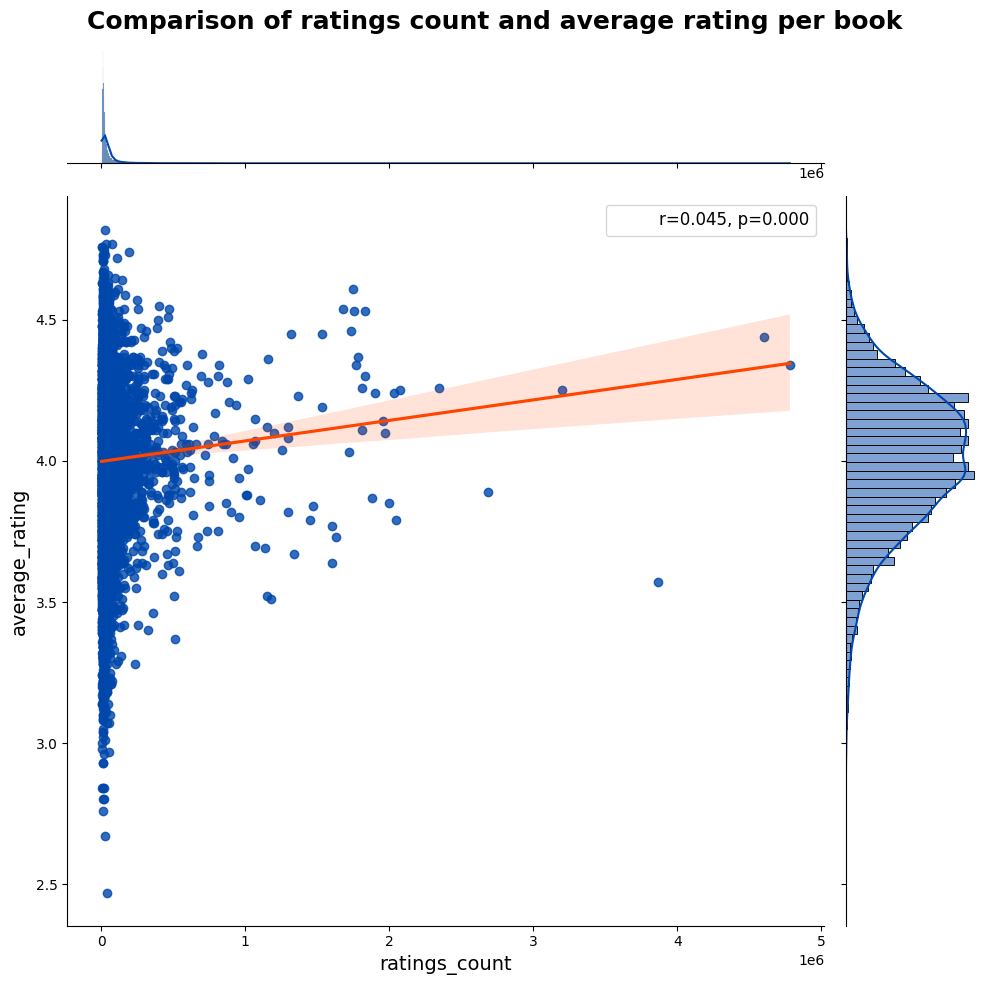

In [38]:
x = Books['ratings_count']
y = Books['average_rating']

# Pass x and y as keyword arguments instead of positional arguments
j = sns.jointplot(x='ratings_count', y='average_rating',
                  data=Books,  # Pass the DataFrame as data
                  height=10,
                  kind='reg',
                  color='#0047AB',
                  line_kws={'color':'orangered'})

# Assuming stats is imported correctly (e.g., from scipy import stats)
r, p = stats.pearsonr(x, y)

phantom, = j.ax_joint.plot([], [], linestyle="", alpha=0)
j.ax_joint.legend([phantom],['r={:.3f}, p={:.3f}'.format(r,p)], fontsize=12)
j.fig.suptitle('Comparison of ratings count and average rating per book', weight='bold', fontsize=18)
j.set_axis_labels('ratings_count', 'average_rating', fontsize=14)
j.figure.tight_layout()
plt.show()

In [39]:
#take 'Stephen King' as an example
auth = []
Books.authors.apply(lambda x: auth.append(x) if 'Stephen King' in x else [])
auth[:5]

['Stephen King',
 'Stephen King, Bernie Wrightson',
 'Stephen King',
 'Stephen King',
 'Stephen King']

In [40]:
# split authors in each books
a = []
Books.authors.apply(lambda x: a.append(x) if ',' in x else [])

# insert splitted author list in every row
authors_list = Books['authors'].apply(lambda x: [a for a in x.split(', ')] if ',' in x else x)
splitted_authors = authors_list.apply(lambda x: pd.Series(x)).stack().reset_index(level=1, drop=True)
splitted_authors.name = 'authors'

# remove previous author column and join the new splitted authors
Books = Books.drop('authors', axis=1).join(splitted_authors)

# take the first author for each book and remove the rest
Books = Books.drop_duplicates(subset='book_id', keep='first')


In [41]:
book_count_real = Books['authors'].value_counts()
book_count_real.head()

,count
authors,
James Patterson,96
Stephen King,80
Nora Roberts,63
Dean Koontz,51
Terry Pratchett,48


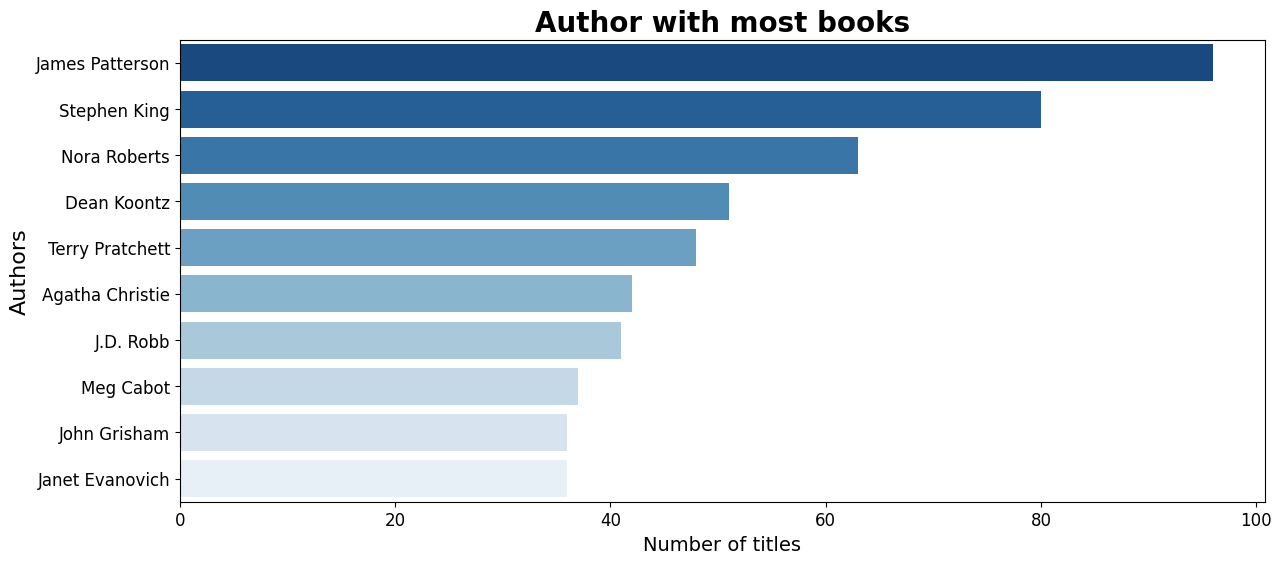

In [42]:
plt.figure(figsize=(14,6))
sns.barplot(x=book_count_real.head(10).values,
            y=book_count_real.head(10).index,
            hue=book_count_real.head(10).index,  # Assign y to hue
            palette='Blues_r',
            legend=False)  # Suppress legend
plt.title('Author with most books', weight='bold', fontsize=20)
plt.xlabel('Number of titles', fontsize=14)
plt.ylabel('Authors', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [43]:
popular_author = Books.groupby('authors')['ratings_count'].sum().sort_values(ascending = False)
popular_author.head(5)

,ratings_count
authors,
J.K. Rowling,16036005
Suzanne Collins,8646393
Stephenie Meyer,8512437
Stephen King,8250167
J.R.R. Tolkien,5454844


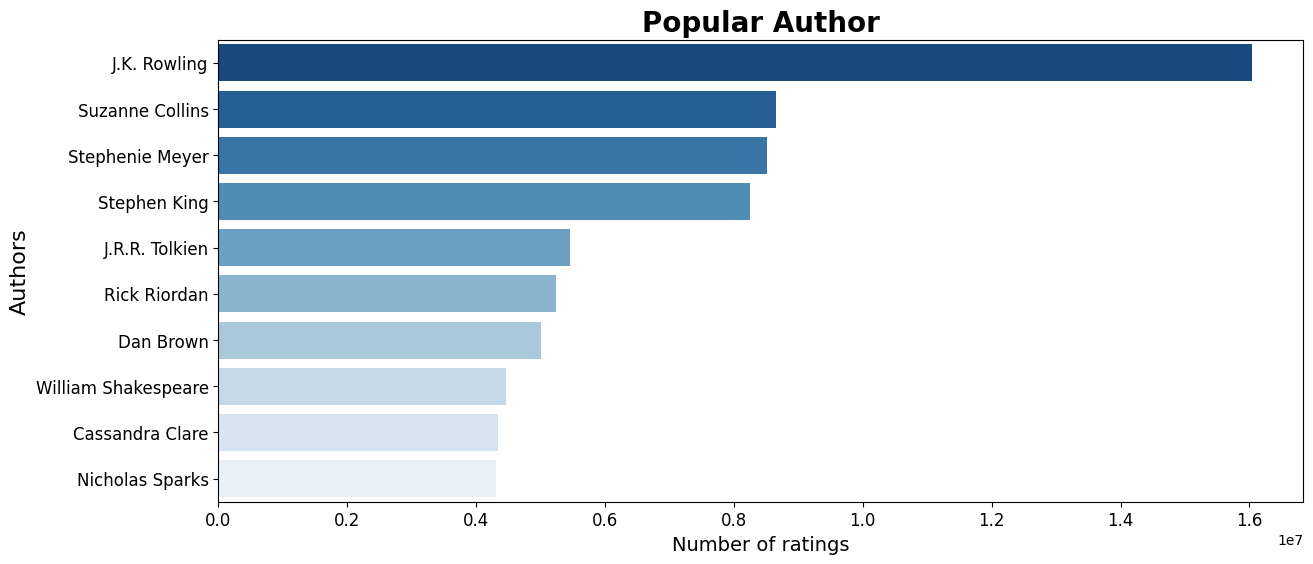

In [44]:
#visualize
plt.figure(figsize=(14,6))
sns.barplot(x=popular_author.head(10).values,
            y=popular_author.head(10).index,
            hue=popular_author.head(10).index,
           palette = 'Blues_r')
plt.title('Popular Author', weight='bold', fontsize=20)
plt.xlabel('Number of ratings', fontsize=14)
plt.ylabel('Authors', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


In [45]:
high_rating_author = Books.groupby('authors')['average_rating'].mean().sort_values(ascending = False)
high_rating_author.head(5)

,average_rating
authors,
Bill Watterson,4.70
Hafez,4.63
James E. Talmage,4.63
Eiichiro Oda,4.63
Angie Thomas,4.62


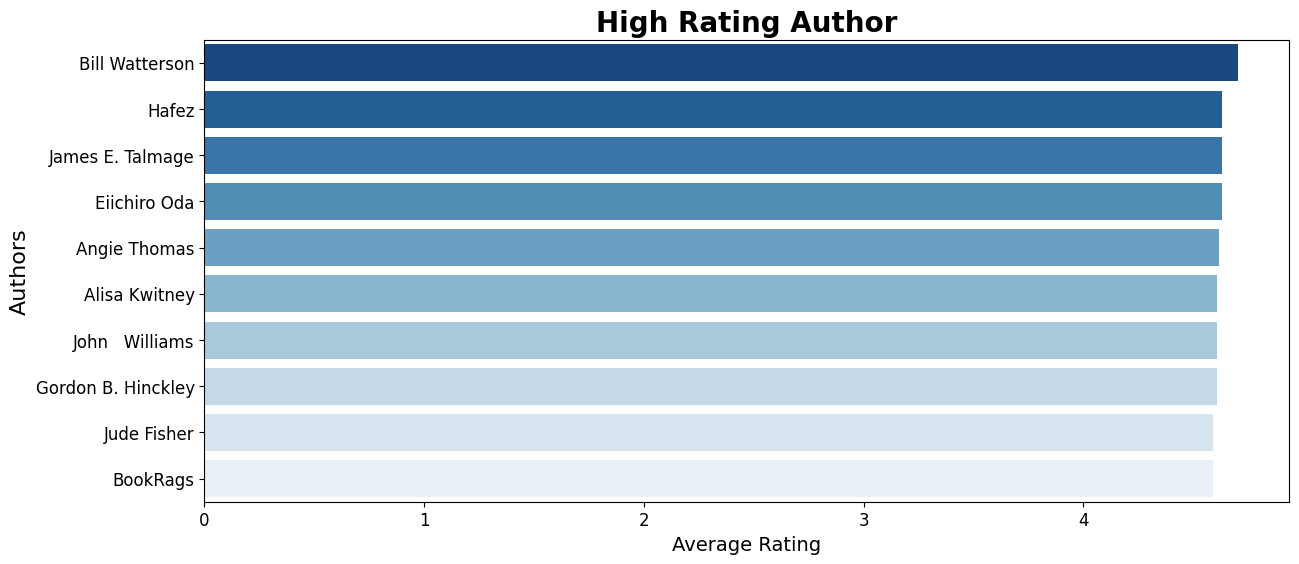

In [46]:
plt.figure(figsize=(14,6))
sns.barplot(x=high_rating_author.head(10).values,
            y=high_rating_author.head(10).index,
            hue=high_rating_author.head(10).index,
           palette = 'Blues_r')
plt.title('High Rating Author', weight='bold', fontsize=20)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Authors', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

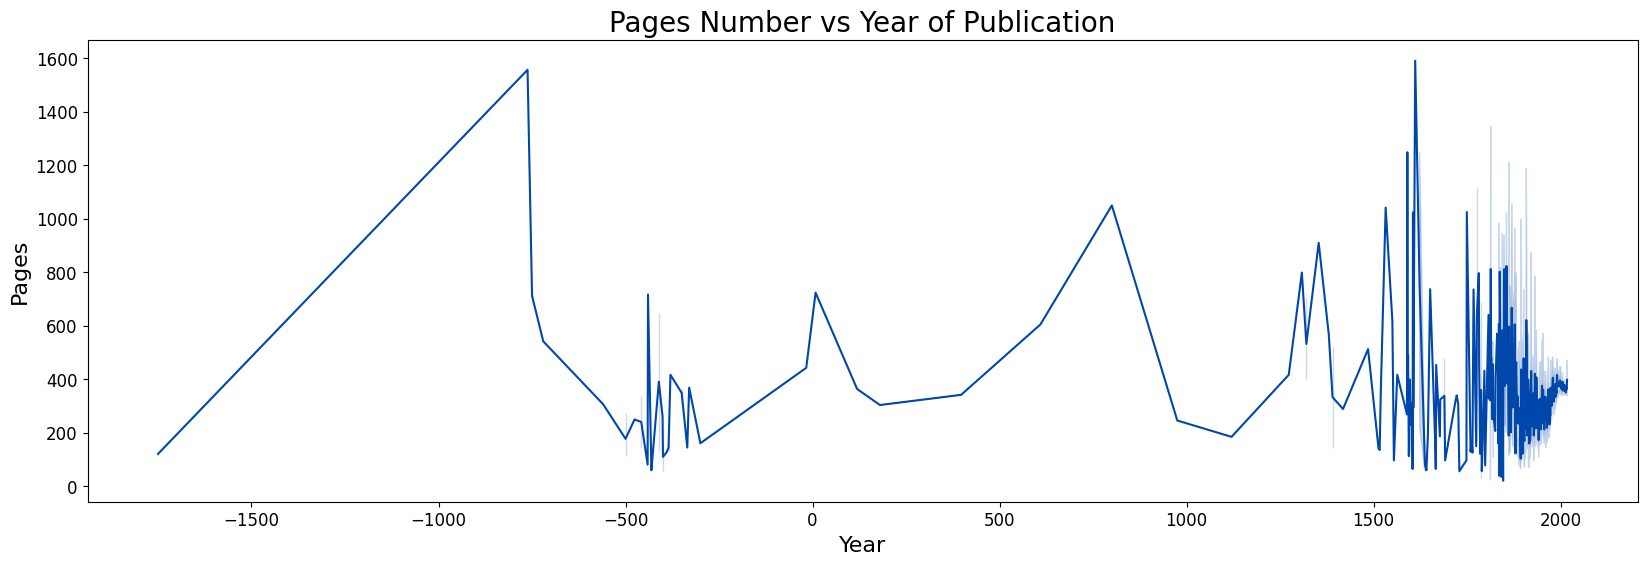

In [47]:
plt.figure(figsize = (20,6))
sns.lineplot(x = 'year', y = 'pages', data = Books, color='#0047AB')
plt.title('Pages Number vs Year of Publication', fontsize =20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Pages', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [48]:
books_after_1800 = Books[Books['year'] > 1800]

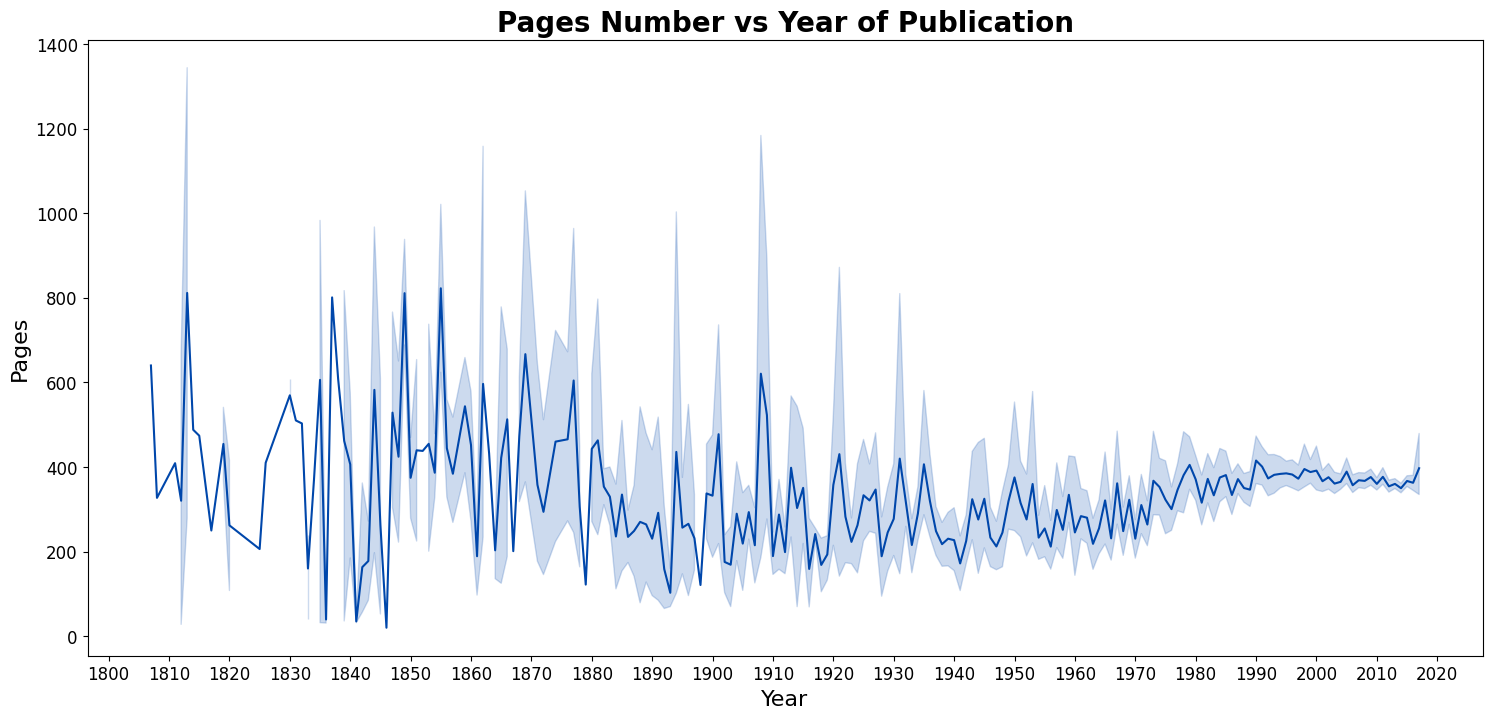

In [49]:

plt.figure(figsize = (18,8))
sns.lineplot(x = 'year', y = 'pages', data = books_after_1800, color='#0047AB')
plt.title('Pages Number vs Year of Publication', weight='bold', fontsize =20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Pages', fontsize=16)
plt.xticks(np.arange(1800, 2021, 10), fontsize=12)
plt.yticks(np.arange(0, 1401, 200), fontsize=12)
plt.show()

In [50]:
g = []
Books.genres.apply(lambda x: g.append(x) if ',' in x else [])
g[:5]

['youngadult, fiction, fantasy, sciencefiction, romance',
 'fantasy, fiction, youngadult, classics',
 'youngadult, fantasy, romance, fiction, paranormal',
 'classics, fiction, historicalfiction, youngadult',
 'classics, fiction, historicalfiction, romance']

In [51]:
#insert splitted author list in every row
genres_list = Books['genres'].apply(lambda x: [g for g in x.split(', ')] if ',' in x else x)
genres_list.head()

,genres
0,"[youngadult, fiction, fantasy, sciencefiction,..."
1,"[fantasy, fiction, youngadult, classics]"
2,"[youngadult, fantasy, romance, fiction, parano..."
3,"[classics, fiction, historicalfiction, youngad..."
4,"[classics, fiction, historicalfiction, romance]"


In [52]:
splitted_genres = genres_list.apply(lambda x: pd.Series(x)).stack().reset_index(level=1, drop=True)
splitted_genres.name = 'genres'
splitted_genres.head()

,genres
0,youngadult
0,fiction
0,fantasy
0,sciencefiction
0,romance


In [53]:
#remove previous author column and join the new splitted authors
book_genres = Books.drop('genres', axis=1).join(splitted_genres)

In [54]:
x = book_genres['genres']
y = book_genres['average_rating']

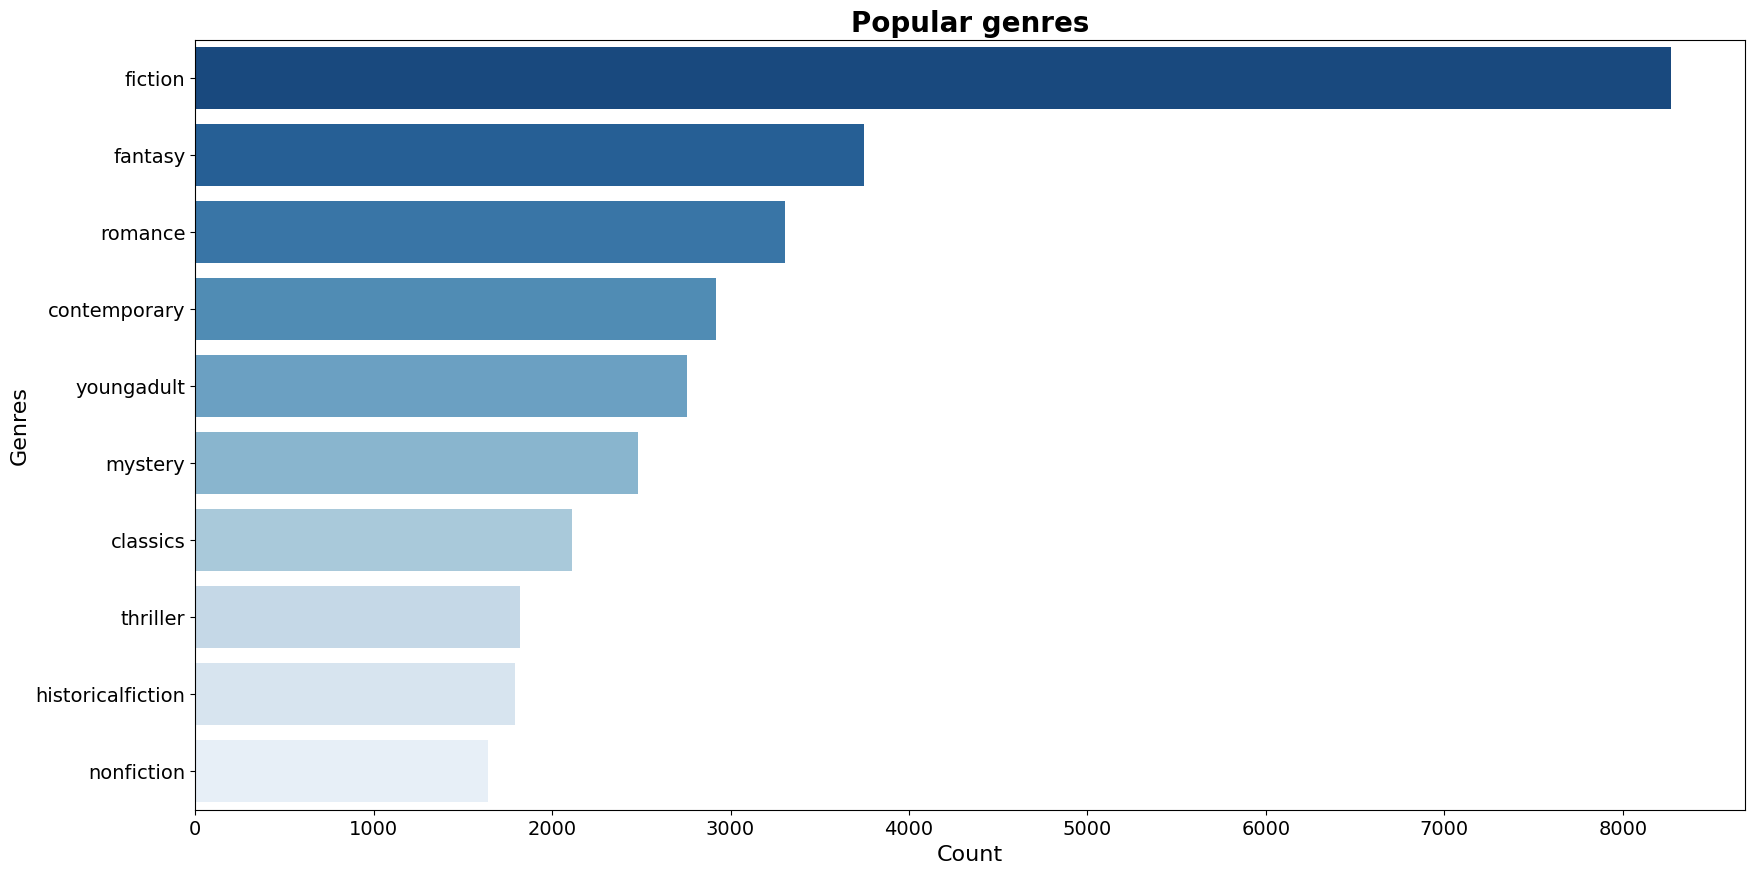

In [55]:
genres_rank = book_genres.genres.value_counts()

#visualize
plt.figure(figsize=(20,10))
sns.barplot(x=genres_rank.head(10).values,
            y=genres_rank.head(10).index,
            hue=genres_rank.head(10).index,
            palette = 'Blues_r')
plt.title('Popular genres', weight='bold', fontsize=20)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Genres', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [56]:
Books.to_csv('/content/drive/MyDrive/BookData/books_trimmed.csv')